In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
base_dir="C:\\Users\\Berk\\Documents\\practicecode\\Embedica\\ML-Tutorial\\datasets\\cupsandpens"
train_dir=os.path.join(base_dir,"train")
valid_dir=os.path.join(base_dir,"valid")

train_cups_dir=os.path.join(train_dir,"cups")
train_pens_dir=os.path.join(train_dir,"pens")

valid_cups_dir=os.path.join(valid_dir,"cups")
valid_pens_dir=os.path.join(valid_dir,"pens")

In [3]:
print('total training cup images :', len(os.listdir(train_cups_dir)))
print('total training pen images :', len(os.listdir(train_pens_dir)))

print('total validation cup images :', len(os.listdir(valid_cups_dir)))
print('total validation pen images :', len(os.listdir(valid_pens_dir)))

total training cup images : 49
total training pen images : 48
total validation cup images : 5
total validation pen images : 2


In [4]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 5 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 5 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(valid_dir,
                                                         batch_size=5,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 97 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cups') and 1 for the other ('pens')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [7]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.fit_generator(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=5,
                    epochs=20,
                    validation_steps=5,
                    verbose=2)

Epoch 1/20
5/5 - 2s - loss: 1.9606 - acc: 0.7727 - val_loss: 0.4661 - val_acc: 0.7368
Epoch 2/20
5/5 - 1s - loss: 0.6652 - acc: 0.7600 - val_loss: 1.6750 - val_acc: 0.7368
Epoch 3/20
5/5 - 2s - loss: 0.7309 - acc: 0.7200 - val_loss: 0.3031 - val_acc: 1.0000
Epoch 4/20
5/5 - 2s - loss: 0.6152 - acc: 0.6800 - val_loss: 0.5915 - val_acc: 0.6842
Epoch 5/20
5/5 - 1s - loss: 0.3018 - acc: 0.8800 - val_loss: 0.8684 - val_acc: 0.5263
Epoch 6/20
5/5 - 1s - loss: 0.4857 - acc: 0.8400 - val_loss: 1.4085 - val_acc: 0.2632
Epoch 7/20
5/5 - 1s - loss: 0.7972 - acc: 0.7200 - val_loss: 3.1018 - val_acc: 0.7368
Epoch 8/20
5/5 - 1s - loss: 1.2465 - acc: 0.6818 - val_loss: 0.3109 - val_acc: 0.7368
Epoch 9/20
5/5 - 1s - loss: 0.1120 - acc: 1.0000 - val_loss: 0.2468 - val_acc: 0.8421
Epoch 10/20
5/5 - 2s - loss: 0.1338 - acc: 1.0000 - val_loss: 0.0952 - val_acc: 1.0000
Epoch 11/20
5/5 - 1s - loss: 0.5507 - acc: 0.7727 - val_loss: 0.1176 - val_acc: 1.0000
Epoch 12/20
5/5 - 1s - loss: 0.1375 - acc: 0.9200 - 

as you can see lots of overfitting

In [15]:
# predicting images
path='C:\\Users\\Berk\\Documents\\practicecode\\Embedica\\ML-Tutorial\\datasets\\cupsandpens\\valid\\cup.jpg'
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print(" is a pen")

else:
    print(" is a cup")

[0.]
 is a cup


In [16]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = images

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(images)

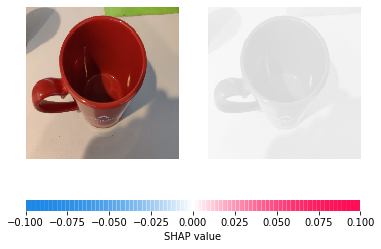

In [17]:
# plot the feature attributions
shap.image_plot(shap_values, images)